## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum().sum() # Видим, что в наборе данных нет пропущенных значений

0

In [4]:
X.sample(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0


In [5]:
X.dtypes # Типы данных, хранящихся в стоблцах - float64. Данные признаки числовые (не категориальные, т.к. возможно сравнение вещественных чисел)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(986)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train[['alcohol', 'magnesium']])
X_train_scaled = scaler.transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = scaler.transform(X_test[['alcohol', 'magnesium']])

In [9]:
df = []
clfs = []
for k in [1, 3, 5, 10, 15, 25]:
  clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train) # В KNeighborsClassifier по умолчанию - метрика Минковского с p = 2, т.е. евклидово расстояние 
  df.append([k, np.mean(clf.predict(X_train_scaled) == y_train).round(2), np.mean(clf.predict(X_test_scaled) == y_test).round(2)])
  clfs.append(clf)
df = pd.DataFrame(df, columns = ['NN', 'Train', 'Test'])

In [10]:
df

,NN,Train,Test
0,1,1.00,0.63
1,3,0.81,0.67
2,5,0.77,0.67
3,10,0.74,0.70
4,15,0.74,0.70
5,25,0.72,0.70


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [11]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

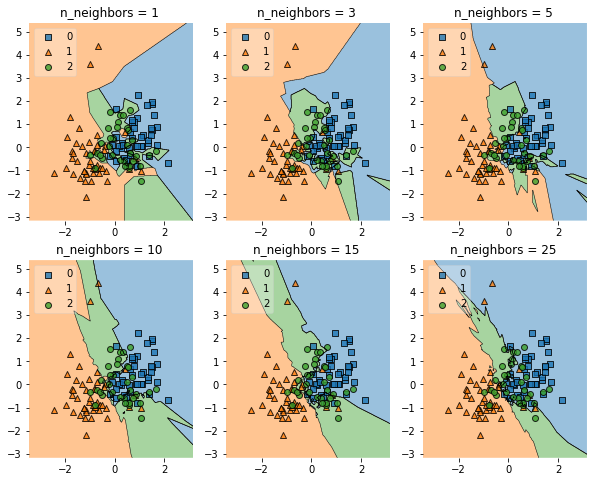

In [13]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = [f'n_neighbors = {k} ' for k in [1, 3, 5, 10, 15, 25]]
for clf, lab, grd in zip(clfs, labels, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

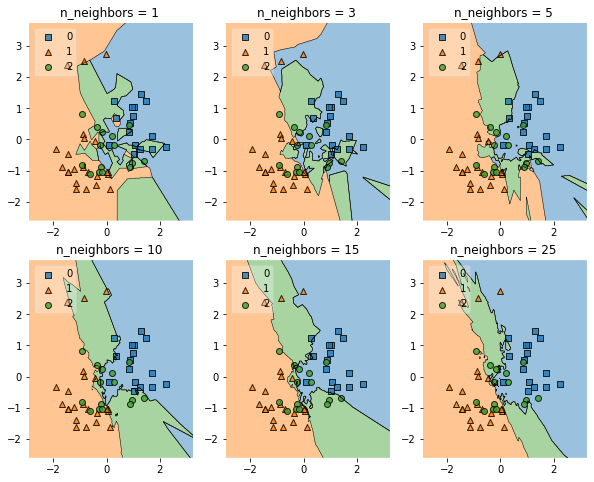

In [14]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = [f'n_neighbors = {k} ' for k in [1, 3, 5, 10, 15, 25]]
for clf, lab, grd in zip(clfs, labels, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_scaled, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

***Ответ.*** Исходя из номера 1.3 заметим, что наилучшее качество на тесте модель показывает при k = 10, 15, 25. Также отметим, что при данных значениях k качество на обучающей выборке значительно меньше отличается от качества на тестовой выборке, чем при k = 1, 3, 5 (для k = 1, 3, 5 качество намного лучше на тесте. Логично предположить, что происходит переобучение). 

Посмотрим на результаты 1.5. Видим, что для k = 1, 3, 5 характерны резкие переходы и выступы. При k = 10 решающая поверхность все еще имеет резкие переходы, а для k = 25 характерны "островы" (Построив дополнительные решающие поверхности для тестовой выборки, видим, что ситуация повторяется).

Как мы помним из семинара, "остров" - это признак переобучения. В результате, рассматривая решающие поверхности обученных классификаторов, заметим, что при k = 15 эти поверхности и для обучающей, и для тестовой выборки наиболее гладкие. Таким образом, k = 15 - наиболее оптимальное значение числа соседей для обучение классификатора.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

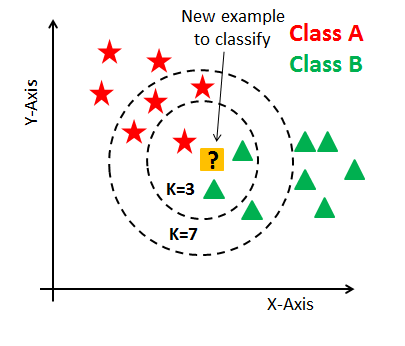

In [15]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
    
    def predict(self, X): # Закомментированное решение - рабочее (такое же) решение, но с циклом
      #y_predicted = []
      #for test in X:
      #  distance = np.sqrt(np.sum(np.square(self.X_train - test), axis=1)) # В качестве метрики будем использовать Евклидову метрику
      #  ind_nn = distance.argsort()[:self.k] # Индексы k ближайших соседей
      #  y_predicted.append(Counter(self.y_train[ind_nn]).most_common(1)[0][0])
      #return np.array(y_predicted)
      return np.array(list(map(lambda test: Counter(self.y_train[(np.sqrt(np.sum(np.square(self.X_train - test), axis=1))).argsort()[:self.k]]).most_common(1)[0][0], X))) 

In [16]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [17]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [171]:
data = pd.read_csv('diamonds.csv') # Надо не забыть загрузить файл в коллаб)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [172]:
data.isnull().sum().sum() # Видим, что в наборе данных нет пропущенных значений

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

*Заметим, что **depth** выражается через x, y, z. Таким образом, этот столбец не несёт доп. информации. Также столбец **Unnamed: 0** используется для индексирования и является бессмысленным для предсказания цены бриллианта.*

In [173]:
data = data.drop(columns=['depth', 'Unnamed: 0'])

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [174]:
data.corr() # Больше всего с целевой переменной коррелируют стобца carat, x, y, z. Со столбцом carat наибольшая корреляция.

,carat,table,price,x,y,z
carat,1.000000,0.181618,0.921591,0.975094,0.951722,0.953387
table,0.181618,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [175]:
data = pd.get_dummies(data, drop_first=True)
data.sample(3)

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
7450,1.14,58.0,4233,6.68,6.64,4.18,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
27886,0.30,58.0,655,4.34,4.36,2.64,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
37011,0.33,60.0,965,4.55,4.52,2.70,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [296]:
np.random.seed(986)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data.price, test_size=0.3, shuffle=True)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [297]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [299]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Train: 1280846.7646806936
Test: 1306679.5503994818


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [300]:
lr.coef_

array([5344.47158382,  -46.60127887, -682.45571463,   77.0230182 ,
       -540.24914153,  183.38534995,  455.14030195,  371.14853775,
        335.19099294,  -82.10571546, -100.96652797, -202.97801348,
       -352.81597262, -444.96588704, -528.70642323,  970.70745973,
       1604.81455284, 1050.37680604, 1665.22246044, 1818.36800427,
       1285.52565324, 1478.84876718])

In [301]:
list(map(int, lr.coef_))

[5344,
 -46,
 -682,
 77,
 -540,
 183,
 455,
 371,
 335,
 -82,
 -100,
 -202,
 -352,
 -444,
 -528,
 970,
 1604,
 1050,
 1665,
 1818,
 1285,
 1478]

In [302]:
data.columns

Index(['carat', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

*Веса 5344, 1604, 1050, 1665, 1818, 1285, 1478 имеют порядок 4, остальные - имеют порядок не более 3. Признаки, соответствующие этим весам - 'carat', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'.*

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [303]:
from sklearn.linear_model import Lasso, Ridge

In [304]:
lr.coef_

array([5344.47158382,  -46.60127887, -682.45571463,   77.0230182 ,
       -540.24914153,  183.38534995,  455.14030195,  371.14853775,
        335.19099294,  -82.10571546, -100.96652797, -202.97801348,
       -352.81597262, -444.96588704, -528.70642323,  970.70745973,
       1604.81455284, 1050.37680604, 1665.22246044, 1818.36800427,
       1285.52565324, 1478.84876718])

In [305]:
data.columns

Index(['carat', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [306]:
ridge = Ridge(10).fit(X_train_scaled, y_train)
ridge.coef_

array([5307.09135593,  -47.00347382, -651.32611944,   74.42279473,
       -533.47947173,  183.55475079,  455.44600574,  371.51594511,
        335.82489995,  -81.67898056, -100.82516554, -202.38793116,
       -351.86831428, -443.65335884, -527.42096344,  958.27525029,
       1574.29307104, 1024.3554611 , 1639.68805636, 1788.7762734 ,
       1267.95441613, 1458.20452794])

*При Ridge-регрессии порядки весов не поменялись, сами веса на немного уменьшились.*

In [307]:
lasso = Lasso(10).fit(X_train_scaled, y_train)
lasso.coef_

array([4836.28196482,  -53.9046459 , -135.31030594,   -0.        ,
       -549.7721178 ,   60.42828159,  256.23250942,  187.86793548,
        168.94111679,  -10.63099297,  -35.28634145, -125.30354178,
       -278.86352494, -372.99785826, -468.89414224,  663.28301406,
        880.65160974,  422.03767969, 1053.53314569, 1113.00561531,
        855.99990353,  980.07601428])

*При Lasso-регрессии сами веса уменьшились, порядки большинства весов не поменялись (кроме 'x' - уменьшился на 2 порядка, 'clarity_SI1', 'clarity_SI2',  'color_E' и 'z'- на 1 порядок).*

*Итак, видим, что и с помощью Lasso-регрессии, и Ridge-регрессии веса в большистве своём могут незначительно уменьшиться. Таким образом, проблема мультиколлинеарности несильно проявлялась в изначальной регрессии.*

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [308]:
norm_ridge = []
norm_lasso = []
alphas = [0.1, 1, 10, 100, 200]
for alpha in alphas:
  ridge = Ridge(alpha).fit(X_train_scaled, y_train)
  lasso = Lasso(alpha).fit(X_train_scaled, y_train)
  norm_ridge.append(np.linalg.norm(ridge.coef_))
  norm_lasso.append(np.linalg.norm(lasso.coef_))

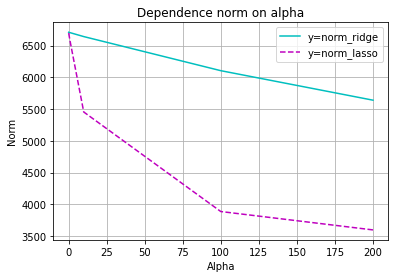

In [309]:
plt.plot(alphas, norm_ridge, 'c') # График построен на основе графика из прошлой домашки
plt.plot(alphas, norm_lasso, '--m')
plt.grid(True)
plt.legend(['y=norm_ridge', 'y=norm_lasso'])
plt.xlabel('Alpha')
plt.ylabel('Norm')
plt.title('Dependence norm on alpha')
plt.show()

*По графику видим, метод Lasso сильнее уменьшает веса. Lasso-регрессия используется для отбора признаков, т.к. при ее применении некоторые веса зануляются.*

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [310]:
from sklearn.linear_model import LassoCV
lrCV = LassoCV(alphas=alphas, cv=5).fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250438728.15102386, tolerance: 48363599.526916996
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7382829619.973343, tolerance: 48363599.526916996
  model = cd_fast.enet_coordinate_descent_gram(


In [311]:
print(lrCV.alphas_)
print(np.mean(lrCV.mse_path_, axis=1))

[2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
[2172228.57243506 1802578.97626825 1344724.44481243 1299072.34363317
 1373025.31697471]


*Значение α, которое дает наибольшее качество = 1*

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [312]:
lasso_best = Lasso(1).fit(X_train_scaled, y_train)
lasso_best.coef_

array([5293.23050778,  -46.93868419, -616.49713183,   49.80586471,
       -533.03464271,  171.80292403,  436.85649955,  353.97301345,
        319.857099  ,  -74.92765212,  -94.39715342, -195.23390658,
       -345.42435686, -437.80467794, -522.75695405,  940.13047471,
       1532.59134798,  987.75293644, 1604.30627423, 1748.04967036,
       1242.75779702, 1429.1813505 ])

In [313]:
data.columns

Index(['carat', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

Заметим, что наиболее информативные признаки - 'carat', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'; неинформативные: 'table', 'x', 'color_E', 'cut_Very Good'. 



*   'carat' - наиболее информативный признак (вес бриллианта) - что логично: чем больше вес, тем больше цена
*   'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2' - логично, что прозрачность алмаз должна значительно влиять на его стоимость: чем лучше прозрачность, тем и цена больше





*   'table' и 'x' - ширина вершины бриллианта относительно самой широкой точки и длина соответственно. Вероятно, что эта ширина и длина не нестолько ценятся, как, например, вес
*   'cut_Very Good' - хорошее качество разреза не такое информативное, в отличие от премиумного - что логично
*   'color_E' - такой цвет оказался неценным для бриллианта 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [314]:
lasso_test_best = Lasso(1).fit(X_train_scaled, y_train)

In [315]:
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")
print(f"Test with lasso (alpha = 1): {mean_squared_error(y_test, lasso_test_best.predict(X_test_scaled))}")

Test: 1306679.5503994818
Test with lasso (alpha = 1): 1304907.1536527432


*Анализируя результат, видим что ошибка при Lasso-регрессии немного меньше. Тогда конечно, лучше использовать именно Lasso-регрессию. Эта модель оказалась немного лучше из-за регуляризации, т.е. из-за "штрафа" за большие веса.*